In [6]:
import sys
sys.path.append('../')
import src.bars as bars
import src.ticksDB as ticksDB

# Connect to the database
tickDB = ticksDB.ticksDB()
tickDB.connect()

# Get the bars
time_bars = bars.timeBars('USA500.IDX', '2021-02-01', '2021-08-01', tickDB, 'minute')
time_bars = time_bars.get_ask_bars()
time_bars.head()

,minu,max_ask_price,min_ask_price,total_ask_volume,open_price,close_price
0,2021-02-01 00:00:00,3687.067,3684.251,0.21819,3684.367,3685.487680
1,2021-02-01 00:01:00,3686.546,3684.301,0.26539,3686.066,3685.409462
2,2021-02-01 00:02:00,3687.046,3685.257,0.21804,3685.858,3686.019379
3,2021-02-01 00:03:00,3687.361,3685.355,0.20551,3685.355,3686.710172
4,2021-02-01 00:04:00,3687.367,3686.701,0.21763,3686.951,3687.077286


In [ ]:
time_bars = bars.timeBars('USA500.IDX', '2021-02-01', '2021-08-01', tickDB, 'hour')
time_bars = time_bars.get_ask_bars()
time_bars.head()

In [ ]:
time_bars = bars.timeBars('USA500.IDX', '2021-02-01', '2021-08-01', tickDB, 'day')
time_bars = time_bars.get_ask_bars()
time_bars.head()

In [1]:
import sys
sys.path.append('../')
import fml.bars as bars
import fml.ticksDB as ticksDB
import fml.bars

# Connect to the database
tickDB = ticksDB.ticksDB()
tickDB.connect()

vB = bars.volumeBar('USA500.IDX', '2021-02-01', '2021-06-02', tickDB, 5000, 10)
results_volume = vB.get_bars()
results_volume.head()

,time,open,high,low,close,volume
0,2021-02-01 00:57:25.607,3684.367,3697.367,3683.801,3703.560,10.00102
1,2021-02-01 01:53:12.861,3692.546,3705.864,3690.551,3702.561,10.00153
2,2021-02-01 02:55:54.941,3702.364,3710.861,3700.046,3723.751,10.00148
3,2021-02-01 04:32:35.041,3705.461,3728.361,3704.246,3731.057,10.00156
4,2021-02-01 06:42:53.535,3724.046,3732.367,3723.348,3737.069,10.00141


In [2]:
results_volume.to_csv('results_volume.csv')


In [3]:
import sys
sys.path.append('../')
import fml.bars as bars
import fml.ticksDB as ticksDB
import fml.bars

# Connect to the database
tickDB = ticksDB.ticksDB()
tickDB.connect()

dB = bars.dollarBar('USA500.IDX', '2021-02-01', '2021-06-02', tickDB, 5000, 36830)
results_dollar = dB.get_bars()
results_dollar.head()

,time,open,high,low,close,volume
0,2021-02-01 00:57:16.608,3684.367,3697.367,3683.801,3703.560,36835.216440
1,2021-02-01 01:52:52.216,3693.264,3705.864,3690.551,3702.561,36837.435052
2,2021-02-01 02:55:04.564,3701.501,3710.861,3700.046,3723.751,36838.144088
3,2021-02-01 04:30:04.370,3706.803,3728.361,3704.246,3731.057,36833.493770
4,2021-02-01 06:37:58.907,3725.857,3732.367,3723.348,3737.069,36832.811644


In [4]:
results_dollar.to_csv("results_dollar.csv")

In [5]:
import sys
sys.path.append('../')
import fml.bars as bars
import fml.ticksDB as ticksDB
import fml.bars

# Connect to the database
tickDB = ticksDB.ticksDB()
tickDB.connect()

dB = bars.tickBars('USA500.IDX', '2021-02-01', '2021-06-02', tickDB, 5000)
results = dB.get_bars()

In [9]:
results.to_csv("results_tick.csv")
results.head()


,time,open,high,low,close,volume
0,2021-02-01 00:52:32.802,3684.367,3697.367,3683.801,3695.849,9.18076
1,2021-02-01 01:43:38.017,3695.767,3705.864,3690.551,3703.560,9.23625
2,2021-02-01 02:41:43.429,3703.767,3710.861,3699.301,3702.561,9.21835
3,2021-02-01 03:52:22.429,3702.569,3726.067,3702.549,3723.751,9.12706
4,2021-02-01 05:46:34.508,3723.864,3732.367,3720.503,3731.057,9.05546


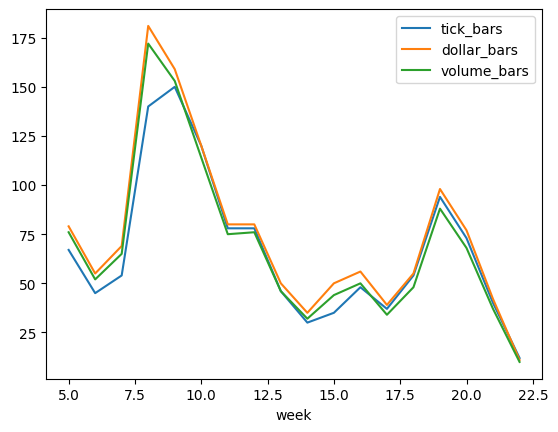

,tick_bars,dollar_bars,volume_bars
count,18.000000,18.000000,18.000000
mean,66.722222,74.222222,68.888889
std,38.120252,43.000076,41.689170
min,12.000000,11.000000,10.000000
25%,41.250000,50.000000,44.500000
50%,54.000000,62.500000,58.500000
75%,78.000000,80.000000,76.000000
max,150.000000,181.000000,172.000000


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
count_df = pd.DataFrame({'tick_bars': results.groupby(results.time.dt.isocalendar().week)['close'].count(), 'dollar_bars': results_dollar.groupby(results_dollar.time.dt.isocalendar().week)['close'].count(), 'volume_bars': results_volume.groupby(results_volume.time.dt.isocalendar().week)['close'].count()})
count_df.plot()
plt.show()

count_df.describe()



Bars:  tick


Autocorrelation:  -0.03704532006239038
Variances:  returns    7.632510e-13
dtype: float64
Jarque_beraResult(statistic=14.503603073246223, pvalue=0.0007088961354281276)


Bars:  dollar


Autocorrelation:  -0.027353095122950737
Variances:  returns    8.520406e-13
dtype: float64
Jarque_beraResult(statistic=59.320320887243774, pvalue=1.3145040611561853e-13)


Bars:  volume


Autocorrelation:  0.006636137304284699
Variances:  returns    7.037185e-13
dtype: float64
Jarque_beraResult(statistic=76.89747969569085, pvalue=0.0)


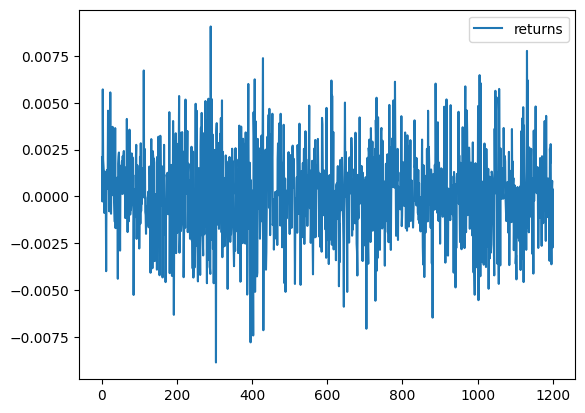

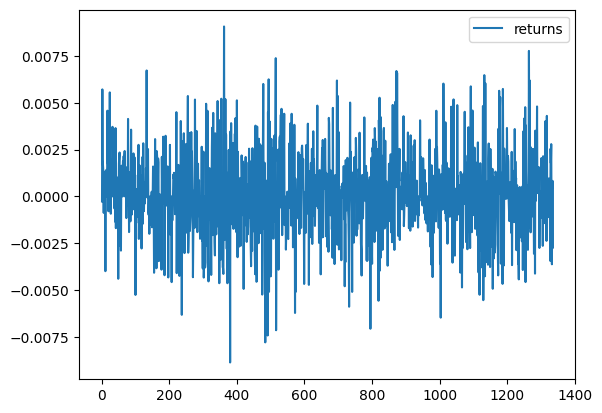

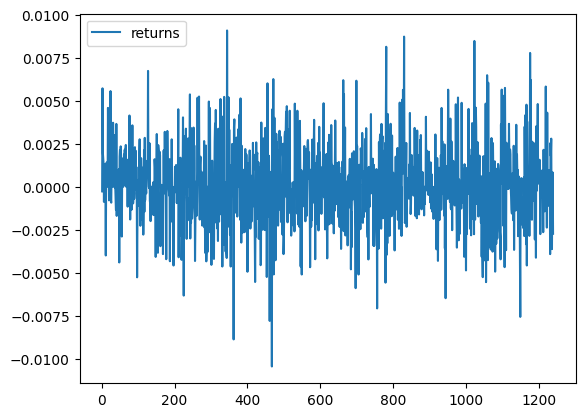

In [30]:
import pandas as pd
import matplotlib as plt
import scipy.stats 
import numpy as np

results_volume = pd.read_csv('results_volume.csv')
results_dollar = pd.read_csv("results_dollar.csv")
results = pd.read_csv("results_tick.csv")
names = ['tick', 'dollar', 'volume']

i= 0
results_set = [results, results_dollar, results_volume]
for bars in results_set:
    print("\n")
    print("Bars: ", names[i])
    i+=1
    print("\n")
    bars['returns'] = bars['close'].pct_change()
    bars.plot(y='returns')

    autoCorr = bars['returns'].autocorr(20)
    print("Autocorrelation: ", autoCorr)
    bars.time = pd.to_datetime(bars.time)


    #partion into monthly subsets
    monthly = bars.resample('M', on='time').agg({'returns': 'var'})
    print("Variances: ", monthly.var())


    # normality test
    x=(bars['returns'].to_numpy())
    x = x[~np.isnan(x)]
    c = scipy.stats.jarque_bera(x)
    print(c)
    

ATTEMPT WITH DIFFERENT CUTOFFS
TODO????